In [1]:
# Import Everything we need

from DLTools.ScanAnalysis import *
from DLTools.LoadModel import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


Using Theano backend.


In [2]:
# Choose the Models to look at

import glob
#ModelDirs=filter(lambda n: n[-1]!="1", glob.glob("TrainedModels.Run.1/*"))
ModelDirs=glob.glob("TrainedModels/*")

MyModels=LoadModels(ModelDirs,MetaDataOnly=True)

In [3]:
# Add the number of epochs to MetaData by counting length of history
def GetEpochs(m):
    m.MetaData["Epochs"]=len(m.MetaData["History"]["val_loss"])
tmp=map(GetEpochs,MyModels)

# Get a List of all numbers stored in MetaData
print GetGoodParams

<function GetGoodParams at 0x10f059c08>


In [4]:
# Pull data from previous trainings into latest MetaData, with "All_" suffix
GetHistorical(MyModels,['Ele_AUC', 'Pi0_AUC', 'ChPi_AUC', 'Gamma_AUC'])

In [5]:
# Make a Table of all relevant parameters, sort by 1,2,then 0 columns.
ScanAnalysis(MyModels,['Model Name', 'Width', 'Depth', 'Epochs', 'Ele_AUC',  'Pi0_AUC', 'ChPi_AUC',  'Gamma_AUC'],[1,2,0])

Model Name               Width    Depth    Epochs    Ele_AUC    Pi0_AUC    ChPi_AUC    Gamma_AUC
---------------------  -------  -------  --------  ---------  ---------  ----------  -----------
CaloDNN_32_1_Merged         32        1         2     0.8215     0.8044      0.9778       0.7925
CaloDNN_32_1_Merged.1       32        1         2     0.8229     0.8054      0.9769       0.8158
CaloDNN_32_1_Merged.2       32        1         2     0.8216     0.8033      0.9774       0.8303
CaloDNN_32_1_Merged.3       32        1         2     0.8234     0.8056      0.9768       0.8430
CaloDNN_32_1_Merged.4       32        1         2     0.8216     0.8037      0.9772       0.8476
CaloDNN_32_1_Merged.5       32        1         2     0.8215     0.8038      0.9772       0.8448


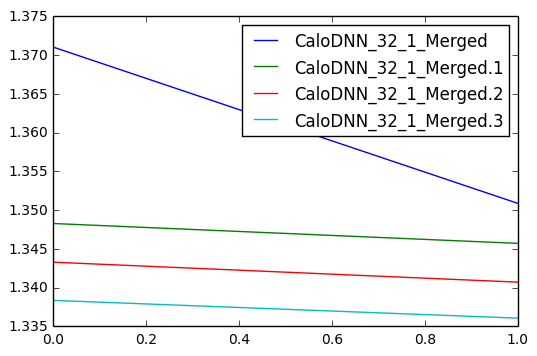

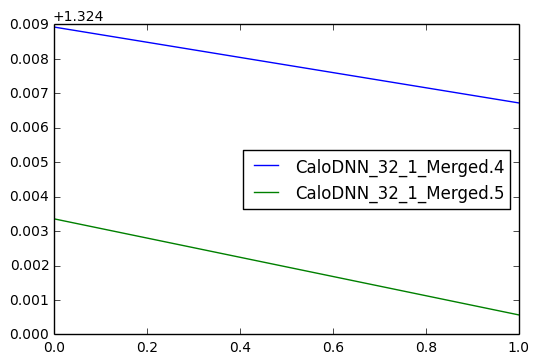

In [6]:
# Plot Historical MetaData... put 4 models per plot
PlotMetaDataMany(MyModels,4,["History","val_loss"])

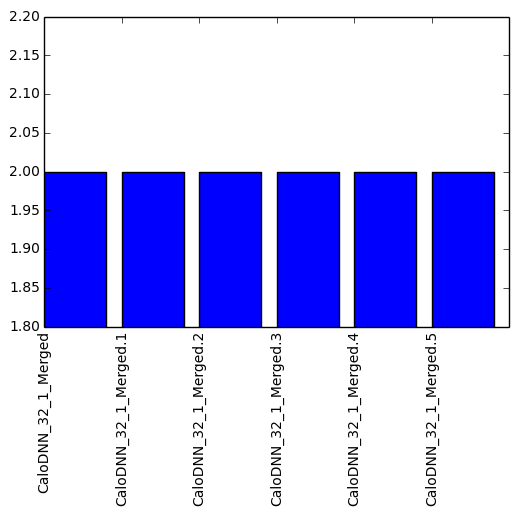

In [7]:
# Compare Number of Epochs each model ran
PlotMetaData(MyModels,["Epochs"])

Ele_AUC


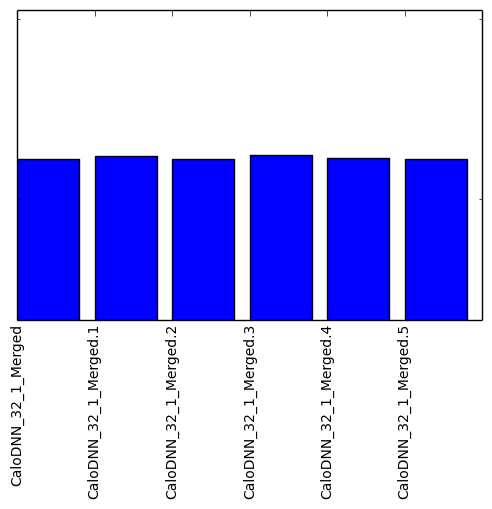

Pi0_AUC


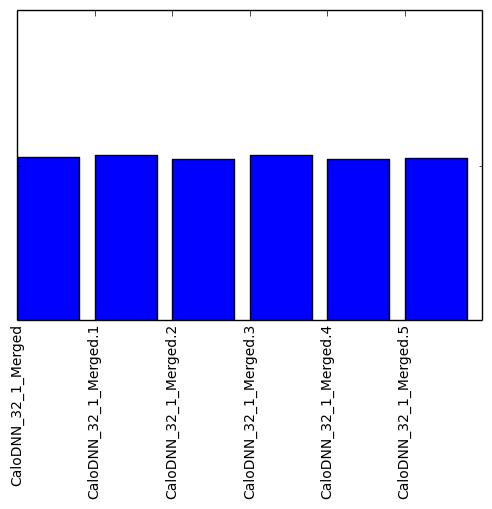

ChPi_AUC


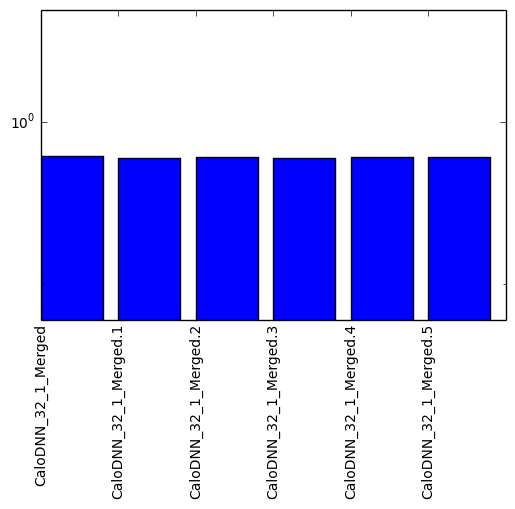

Gamma_AUC


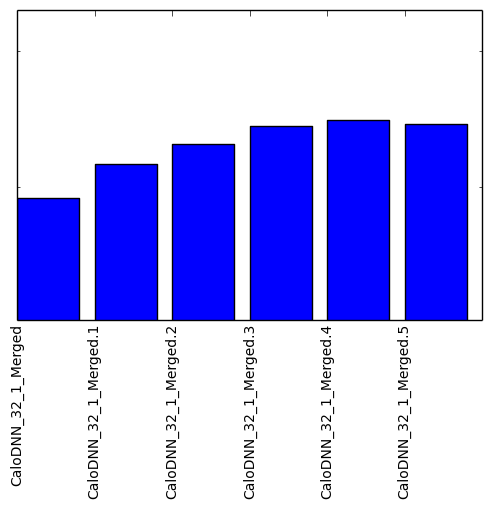

In [8]:
# Compare AUCs for all models
for p in ['Ele_AUC', 'Pi0_AUC', 'ChPi_AUC', 'Gamma_AUC']:
    print p
    PlotMetaData(MyModels,[p],log=True)
    plt.show()

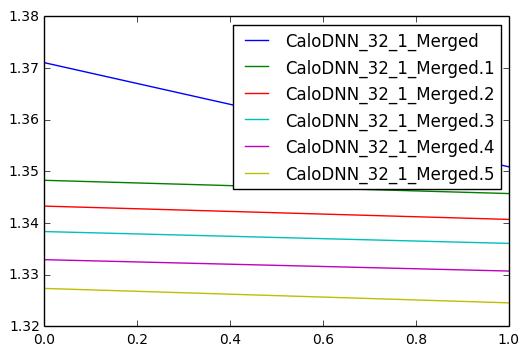

In [9]:
# Select models with width==32 and plot val_loss.
PlotMetaData(filter(lambda m: m.MetaData["Width"]==32, MyModels), ["History","val_loss"],loc=0)

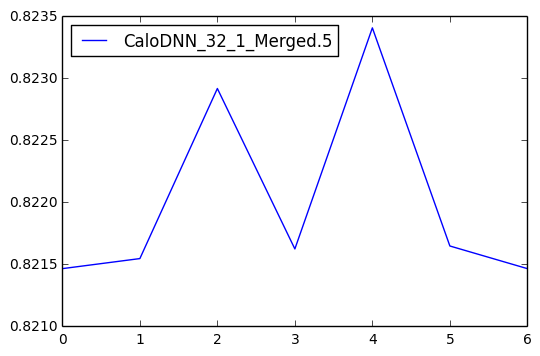

In [10]:
# Plot a varible for all trainings. This was pulled together above.
PlotMetaData([MyModels[5]],["All_Ele_AUC"])